In [1]:
import pandas as fluff
import csv

song_parts = fluff.read_csv('songs_parts.csv',sep=',', encoding = "ISO-8859-1")

with open('song_chorus.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["id", "text"])
    for i in range(len(song_parts.index)):
        try:
            an_chorus = song_parts.loc[i, 'chorus']
            song_title = song_parts.loc[i, 'Song Title']
            sentiment_writer.writerow([song_title,an_chorus])
        except Exception as e:
            print(e)
            
with open('song_verse.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["id", "text"])
    for i in range(len(song_parts.index)):
        try:
            verse = song_parts.loc[i, 'verse']
            song_title = song_parts.loc[i, 'Song Title']
            sentiment_writer.writerow([song_title,verse])
        except Exception as e:
            print(e)



In [4]:
import pandas as pd
import csv
song_verse = pd.read_csv('song_verse.csv',error_bad_lines=False)
song_chorus = pd.read_csv('song_chorus.csv',error_bad_lines=False)
audio_features = pd.read_csv('audio_features.csv',error_bad_lines=False)
merged = pd.merge(audio_features,song_verse, how='left', on='Song Title')
merged = pd.merge(merged,song_chorus, how='left', on='Song Title')
merged.to_csv('merged.csv', index=False)


In [5]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import csv
sp = pd.read_csv('merged.csv', sep=',', encoding = "ISO-8859-1")
chorus_part = sp.chorus


natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='3e96f7e6-dd45-4207-a804-32e49f400be2',
  password='LmirYjWVQMr1',
  version='2017-02-27')

with open('sentiment_chorus.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "sadness","joy","fear","disgust","anger"])
    for i in range(len(sp.index)):
        try:
            an_chorus = sp.loc[i, 'chorus']
            artist = sp.loc[i, 'Artist']
            song_title = sp.loc[i, 'Song Title']
            #try:
            response = natural_language_understanding.analyze(
                text= an_chorus,
                features=Features(
                emotion=EmotionOptions()))
            response = response['emotion']['document']
            print(response)
            #except Exception as e:
                #print('ERROR')
            sentiment_writer.writerow([artist, song_title, response['emotion']['sadness'],response['emotion']['joy'],response['emotion']['fear'],response['emotion']['disgust'],response['emotion']['anger']])
        except Exception as e:
            print(e)
            


{'emotion': {'sadness': 0.183425, 'joy': 0.773032, 'fear': 0.035934, 'disgust': 0.001244, 'anger': 0.014387}}
{'emotion': {'sadness': 0.132957, 'joy': 0.572446, 'fear': 0.377735, 'disgust': 0.002654, 'anger': 0.008717}}
{'emotion': {'sadness': 0.153447, 'joy': 0.328575, 'fear': 0.140589, 'disgust': 0.071614, 'anger': 0.12738}}
{'emotion': {'sadness': 0.548347, 'joy': 0.205348, 'fear': 0.044473, 'disgust': 0.097251, 'anger': 0.248512}}
{'emotion': {'sadness': 0.63191, 'joy': 0.012463, 'fear': 0.280514, 'disgust': 0.090544, 'anger': 0.252588}}
{'emotion': {'sadness': 0.108436, 'joy': 0.730176, 'fear': 0.068314, 'disgust': 0.037594, 'anger': 0.053366}}
{'emotion': {'sadness': 0.154045, 'joy': 0.209924, 'fear': 0.163634, 'disgust': 0.066356, 'anger': 0.120948}}
{'emotion': {'sadness': 0.609175, 'joy': 0.064401, 'fear': 0.069821, 'disgust': 0.168463, 'anger': 0.356413}}
{'emotion': {'sadness': 0.693173, 'joy': 0.022259, 'fear': 0.147759, 'disgust': 0.086962, 'anger': 0.364451}}
{'emotion': 

{'emotion': {'sadness': 0.209123, 'joy': 0.24983, 'fear': 0.576325, 'disgust': 0.021309, 'anger': 0.068941}}
{'emotion': {'sadness': 0.742598, 'joy': 0.013113, 'fear': 0.132119, 'disgust': 0.092184, 'anger': 0.321946}}
{'emotion': {'sadness': 0.540427, 'joy': 0.583269, 'fear': 0.172316, 'disgust': 0.107033, 'anger': 0.118476}}
{'emotion': {'sadness': 0.476197, 'joy': 0.223784, 'fear': 0.214965, 'disgust': 0.052506, 'anger': 0.107518}}
{'emotion': {'sadness': 0.267307, 'joy': 0.02988, 'fear': 0.100417, 'disgust': 0.010541, 'anger': 0.033069}}
{'emotion': {'sadness': 0.061936, 'joy': 0.104017, 'fear': 0.060835, 'disgust': 0.009525, 'anger': 0.045088}}
{'emotion': {'sadness': 0.720894, 'joy': 0.074478, 'fear': 0.210179, 'disgust': 0.128074, 'anger': 0.103155}}
{'emotion': {'sadness': 0.014814, 'joy': 0.567268, 'fear': 0.013416, 'disgust': 0.009428, 'anger': 0.024065}}
{'emotion': {'sadness': 0.097787, 'joy': 0.071019, 'fear': 0.13505, 'disgust': 0.468633, 'anger': 0.190046}}
{'emotion': {

{'emotion': {'sadness': 0.39094, 'joy': 0.504746, 'fear': 0.124454, 'disgust': 0.008171, 'anger': 0.061871}}
{'emotion': {'sadness': 0.095475, 'joy': 0.025074, 'fear': 0.08225, 'disgust': 0.459191, 'anger': 0.054818}}
{'emotion': {'sadness': 0.722164, 'joy': 0.008694, 'fear': 0.278267, 'disgust': 0.120152, 'anger': 0.202748}}
{'emotion': {'sadness': 0.481857, 'joy': 0.098255, 'fear': 0.109639, 'disgust': 0.067014, 'anger': 0.500851}}
{'emotion': {'sadness': 0.729459, 'joy': 0.175846, 'fear': 0.094251, 'disgust': 0.017878, 'anger': 0.05895}}
{'emotion': {'sadness': 0.239557, 'joy': 0.163917, 'fear': 0.304836, 'disgust': 0.202081, 'anger': 0.173261}}
{'emotion': {'sadness': 0.637931, 'joy': 0.022913, 'fear': 0.326318, 'disgust': 0.056625, 'anger': 0.272818}}
{'emotion': {'sadness': 0.394882, 'joy': 0.299906, 'fear': 0.072558, 'disgust': 0.127259, 'anger': 0.27965}}
{'emotion': {'sadness': 0.201531, 'joy': 0.529275, 'fear': 0.164457, 'disgust': 0.067845, 'anger': 0.107668}}
{'emotion': {'

In [6]:
ch = pd.read_csv('sentiment_chorus.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
for i in arr:
    index, value = max(enumerate(i[2:7]), key=operator.itemgetter(1))
    indexes.append(index)

from collections import Counter
Counter(indexes)

Counter({0: 72, 1: 85, 2: 21, 3: 10, 4: 22})

In [3]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions
import pandas as pd
import csv
sp = pd.read_csv('merged.csv', sep=',', encoding = "ISO-8859-1")
chorus_part = sp.verse

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='3e96f7e6-dd45-4207-a804-32e49f400be2',
  password='LmirYjWVQMr1',
  version='2017-02-27')

with open('sentiment_verse.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "sadness","joy","fear","disgust","anger"])
    for i in range(len(sp.index)):
        try:
            an_verse = sp.loc[i, 'verse']
            artist = sp.loc[i, 'Artist']
            song_title = sp.loc[i, 'Song Title']
            #try:
            response = natural_language_understanding.analyze(
                text= an_verse,
                features=Features(
                emotion=EmotionOptions()))
            response = response['emotion']['document']
            print(response)
            #except Exception as e:
                #print('ERROR')
            sentiment_writer.writerow([artist, song_title, response['emotion']['sadness'],response['emotion']['joy'],response['emotion']['fear'],response['emotion']['disgust'],response['emotion']['anger']])
        except Exception as e:
            print(e)
            

{'emotion': {'sadness': 0.297842, 'joy': 0.643527, 'fear': 0.023434, 'disgust': 0.001863, 'anger': 0.058054}}
{'emotion': {'sadness': 0.403503, 'joy': 0.377848, 'fear': 0.154008, 'disgust': 0.15808, 'anger': 0.011867}}
{'emotion': {'sadness': 0.428785, 'joy': 0.416169, 'fear': 0.064478, 'disgust': 0.023707, 'anger': 0.171035}}
{'emotion': {'sadness': 0.061348, 'joy': 0.425657, 'fear': 0.467841, 'disgust': 0.13389, 'anger': 0.066499}}
{'emotion': {'sadness': 0.514236, 'joy': 0.050308, 'fear': 0.193708, 'disgust': 0.048115, 'anger': 0.143655}}
{'emotion': {'sadness': 0.486107, 'joy': 0.304272, 'fear': 0.234288, 'disgust': 0.021502, 'anger': 0.074984}}
{'emotion': {'sadness': 0.701646, 'joy': 0.062193, 'fear': 0.118404, 'disgust': 0.104477, 'anger': 0.240947}}
{'emotion': {'sadness': 0.515507, 'joy': 0.22886, 'fear': 0.133895, 'disgust': 0.168, 'anger': 0.118165}}
{'emotion': {'sadness': 0.210235, 'joy': 0.272624, 'fear': 0.149741, 'disgust': 0.153876, 'anger': 0.114252}}
{'emotion': {'sa

{'emotion': {'sadness': 0.065117, 'joy': 0.912893, 'fear': 0.012306, 'disgust': 0.002553, 'anger': 0.006147}}
{'emotion': {'sadness': 0.761584, 'joy': 0.011761, 'fear': 0.190084, 'disgust': 0.141059, 'anger': 0.20599}}
{'emotion': {'sadness': 0.743834, 'joy': 0.044061, 'fear': 0.274736, 'disgust': 0.063926, 'anger': 0.128341}}
{'emotion': {'sadness': 0.449842, 'joy': 0.302461, 'fear': 0.268298, 'disgust': 0.047476, 'anger': 0.081678}}
{'emotion': {'sadness': 0.602714, 'joy': 0.443604, 'fear': 0.734631, 'disgust': 0.076049, 'anger': 0.155717}}
{'emotion': {'sadness': 0.40222, 'joy': 0.155323, 'fear': 0.106365, 'disgust': 0.129934, 'anger': 0.430826}}
{'emotion': {'sadness': 0.779903, 'joy': 0.027967, 'fear': 0.323393, 'disgust': 0.053784, 'anger': 0.038872}}
{'emotion': {'sadness': 0.091363, 'joy': 0.584091, 'fear': 0.283291, 'disgust': 0.018138, 'anger': 0.009844}}
{'emotion': {'sadness': 0.111728, 'joy': 0.052887, 'fear': 0.313691, 'disgust': 0.475199, 'anger': 0.399097}}
{'emotion': 

{'emotion': {'sadness': 0.47012, 'joy': 0.455504, 'fear': 0.053662, 'disgust': 0.003529, 'anger': 0.091756}}
{'emotion': {'sadness': 0.184777, 'joy': 0.705497, 'fear': 0.049556, 'disgust': 0.016908, 'anger': 0.07537}}
{'emotion': {'sadness': 0.656801, 'joy': 0.042781, 'fear': 0.217052, 'disgust': 0.030587, 'anger': 0.334483}}
{'emotion': {'sadness': 0.296622, 'joy': 0.341396, 'fear': 0.111241, 'disgust': 0.219863, 'anger': 0.18903}}
{'emotion': {'sadness': 0.1544, 'joy': 0.64239, 'fear': 0.110089, 'disgust': 0.02365, 'anger': 0.114884}}
{'emotion': {'sadness': 0.506958, 'joy': 0.007341, 'fear': 0.555567, 'disgust': 0.070571, 'anger': 0.208263}}
{'emotion': {'sadness': 0.675372, 'joy': 0.117309, 'fear': 0.247215, 'disgust': 0.042176, 'anger': 0.152971}}
{'emotion': {'sadness': 0.322269, 'joy': 0.101365, 'fear': 0.19394, 'disgust': 0.284161, 'anger': 0.127133}}
{'emotion': {'sadness': 0.194958, 'joy': 0.693048, 'fear': 0.071702, 'disgust': 0.032273, 'anger': 0.040299}}
{'emotion': {'sadn

In [2]:

ch = pd.read_csv('sentiment_verse.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
for i in arr:
    index, value = max(enumerate(i[2:7]), key=operator.itemgetter(1))
    indexes.append(index)

from collections import Counter
Counter(indexes)

Counter({0: 93, 1: 73, 2: 16, 3: 6, 4: 24})

In [2]:
import pandas as pd
import csv

ch = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.Genre

from collections import Counter
Counter(arr)

Counter({1: 13,
         3: 45,
         4: 1,
         5: 1,
         6: 2,
         7: 1,
         8: 22,
         9: 9,
         10: 34,
         11: 3,
         12: 17,
         13: 4,
         14: 13,
         15: 5,
         16: 1,
         17: 4,
         18: 9,
         19: 13,
         20: 7,
         21: 2,
         22: 6})

In [20]:
#clustering 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lyrics = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
X_lyrics = lyrics[['Tempo','Loudness','Energy','Genre', 'sadness_verse','joy_verse', 'fear_verse','disgust_verse','anger_verse','sadness_chorus', 'joy_chorus','fear_chorus', 'disgust_chorus','anger_chorus']].as_matrix()
X_lyrics

array([[  8.64780000e+01,  -7.32000000e+00,   7.36000000e-01, ...,
          3.59340000e-02,   1.24400000e-03,   1.43870000e-02],
       [  1.18029000e+02,  -1.13330000e+01,   6.61000000e-01, ...,
          3.77735000e-01,   2.65400000e-03,   8.71700000e-03],
       [  1.42380000e+02,  -6.83200000e+00,   8.77000000e-01, ...,
          1.40589000e-01,   7.16140000e-02,   1.27380000e-01],
       ..., 
       [  1.43529000e+02,  -1.12230000e+01,   3.00000000e-01, ...,
          2.45088000e-01,   2.93748000e-01,   1.36080000e-01],
       [  8.36370000e+01,  -8.61800000e+00,   6.49000000e-01, ...,
          5.48770000e-02,   2.36930000e-02,   5.13220000e-02],
       [  8.27310000e+01,  -8.22200000e+00,   5.96000000e-01, ...,
          1.81086000e-01,   6.33500000e-03,   6.81970000e-02]])

In [101]:
sp = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
gen = []
for i in arr_1:
    try:
        print(sp.loc[i, 'Artist'])
        print(sp.loc[i, 'Song Title'])
        #print(sp.loc[i, 'Tempo'])
        #print(sp.loc[i, 'Loudness'])
        #print(sp.loc[i, 'Energy'])
        print(sp.loc[i, 'Genre'])
        #print(sp.loc[i, 'joy_verse'])
        #print(sp.loc[i, 'fear_verse'])
        #print(sp.loc[i, 'disgust_verse'])
        #print(sp.loc[i, 'anger_verse'])
        #print(sp.loc[i, 'sadness_chorus'])
        #print(sp.loc[i, 'joy_chorus'])
        #print(sp.loc[i, 'fear_chorus'])
        #print(sp.loc[i, 'disgust_chorus'])
        #print(sp.loc[i, 'anger_chorus'])
        gen.append(sp.loc[i, 'Genre'])
    except Exception as e:
        print(e)

from collections import Counter
Counter(gen)  


Antonio Flores
Isla de Palma
5
Badfinger
Come On
3
Badfinger
Dennis
3
Badfinger
Just A Chance
3
Badfinger
Know One Knows
3
Badfinger
Three Time Loser
3
Billie Holiday
Gloomy Sunday
6
Chris Cornell
Before We Disappear
8
Chris Cornell
Higher Truth
8
Chris Cornell
Let Your Eyes Wander
8
Chris Cornell
Nearly Forgot My Broken Heart
8
Chris Cornell
Our Time In The Universe
8
Chris Cornell
Wrong Side
8
Del Shannon
Runaway
6
Donny Hathaway
Come Little Children
9
Donny Hathaway
Lord Help Me
9
Donny Hathaway
Magdalena
9
Elliott Smith
King's Crossing
10
Elliott Smith
Little One
10
Elliott Smith
Strung Out Again
10
Elliott Smith
The Last Hour
10
Elliott Smith
Twilight
10
Ephraim Lewis
Drowning in Your Eyes
11
Ephraim Lewis
Sad Song
11
Germs
American Leather
12
Germs
Communist Eyes
12
Germs
Dragon Lady
12
Germs
Land of Treason
12
Germs
Media Blitz
12
Germs
Our Way
12
Germs
Shut Down
12
Germs
Strange Notes
12
Germs
The Other Newest One
12
Germs
The Slave
12
Germs
What We Do Is Secret
12
Herman Brood

Counter({1: 2,
         3: 21,
         5: 1,
         6: 2,
         8: 11,
         9: 4,
         10: 17,
         11: 2,
         12: 11,
         13: 2,
         14: 4,
         15: 2,
         16: 1,
         17: 2,
         19: 7,
         20: 4,
         22: 2})

In [102]:
gen_2 = []
for i in arr_2:
    try:
        print(sp.loc[i, 'Artist'])
        print(sp.loc[i, 'Song Title'])
        #print(sp.loc[i, 'Tempo'])
        #print(sp.loc[i, 'Loudness'])
        #print(sp.loc[i, 'Energy'])
        print(sp.loc[i, 'Genre'])
        #print(sp.loc[i, 'joy_verse'])
        #print(sp.loc[i, 'fear_verse'])
        #print(sp.loc[i, 'disgust_verse'])
        #print(sp.loc[i, 'anger_verse'])
        #print(sp.loc[i, 'sadness_chorus'])
        #print(sp.loc[i, 'joy_chorus'])
        #print(sp.loc[i, 'fear_chorus'])
        #print(sp.loc[i, 'disgust_chorus'])
        #print(sp.loc[i, 'anger_chorus'])
        gen_2.append(sp.loc[i, 'Genre'])
    except Exception as e:
        print(e)

from collections import Counter
Counter(gen_2)  


Albert Ayler
Music is the Healing force of the Universe
4
Badfinger
Too Hung Up On You
3
Bob Brozman
The Lonesome Road
7
Chris Cornell
Dead Wishes
8
Chris Cornell
Josephine
8
Chris Cornell
Misery Chain
8
Chris Cornell
Murderer Of Blue Skies
8
Chris Cornell
Only These Words
8
Chris Cornell
Through The Window
8
Chris Cornell
Worried Moon
8
Donny Hathaway
I Love You More Than You'll Ever Know
9
Donny Hathaway
Love love love
9
Donny Hathaway
Someday We'll All Be Free
9
Elliott Smith
A Distorted Reality is Now a Necessity to be Free
10
Elliott Smith
A Passing Feeling
10
Elliott Smith
Coast To Coast
10
Elliott Smith
Let's Get Lost
10
Elliott Smith
Memory Lane
10
Elliott Smith
Pretty (Ugly Before)
10
Elliott Smith
Shooting Star
10
Ephraim Lewis
Mortal Seed
11
Germs
Let's Pretend
12
Germs
Lexicon Devil
12
Germs
Manimal
12
Germs
Richie Dagger's Crime
12
Germs
We Must Bleed
12
hide
Hurry go round
13
Jonghyun
#Hashtag
14
Jonghyun
Before Our Spring
14
Jonghyun
Im So Curious
14
Jonghyun
Just for a

Counter({1: 6,
         3: 16,
         4: 1,
         7: 1,
         8: 7,
         9: 3,
         10: 10,
         11: 1,
         12: 5,
         13: 1,
         14: 9,
         15: 3,
         18: 2,
         19: 5,
         20: 1,
         21: 1,
         22: 4})

In [10]:
#clustering with 3d visuas
import numpy as np
import pandas as pd

import csv

def ClusterIndicesNumpy(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

ch = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
arr = ch.values
indexes = []
import operator
with open('maximum_emotion.csv', 'w',  encoding="utf-8") as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Artist", "Song Title", "verse_emotion","chorus_emotion","Genre","Tempo","Loudness","Energy"])
    for i in range(len(ch.index)):
        index_verse, value_verse = max(enumerate(ch.loc[i][6:11]), key=operator.itemgetter(1))
        index_chorus, value_chorus = max(enumerate(ch.loc[i][11:16]), key=operator.itemgetter(1))
        sentiment_writer.writerow([ch.loc[i, 'Artist'],ch.loc[i, 'Song Title'],index_verse,index_chorus,ch.loc[i, 'Genre'],ch.loc[i, 'Tempo'],ch.loc[i, 'Loudness'],ch.loc[i, 'Energy']])
lyrics = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
Y_lyrics = lyrics[['verse_emotion','chorus_emotion','Genre',"Tempo","Loudness","Energy"]].as_matrix()
Y_lyrics       

array([[   1.   ,    1.   ,    4.   ,   86.478,   -7.32 ,    0.736],
       [   0.   ,    1.   ,    5.   ,  118.029,  -11.333,    0.661],
       [   0.   ,    1.   ,    3.   ,  142.38 ,   -6.832,    0.877],
       ..., 
       [   0.   ,    3.   ,   22.   ,  143.529,  -11.223,    0.3  ],
       [   1.   ,    1.   ,   22.   ,   83.637,   -8.618,    0.649],
       [   4.   ,    0.   ,   22.   ,   82.731,   -8.222,    0.596]])

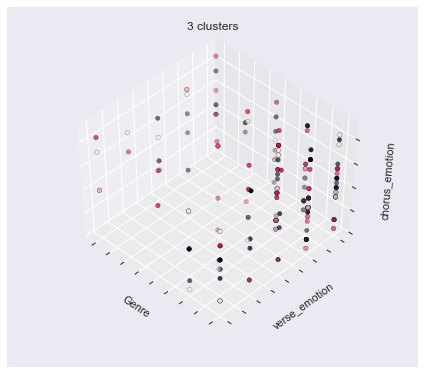

In [22]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = Y_lyrics 
estimators = [('k_means_iris_3', KMeans(n_clusters=3))]
fignum = 1
titles = ['3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:,1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Genre')
    ax.set_ylabel('verse_emotion')
    ax.set_zlabel('chorus_emotion')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
#plt.show()


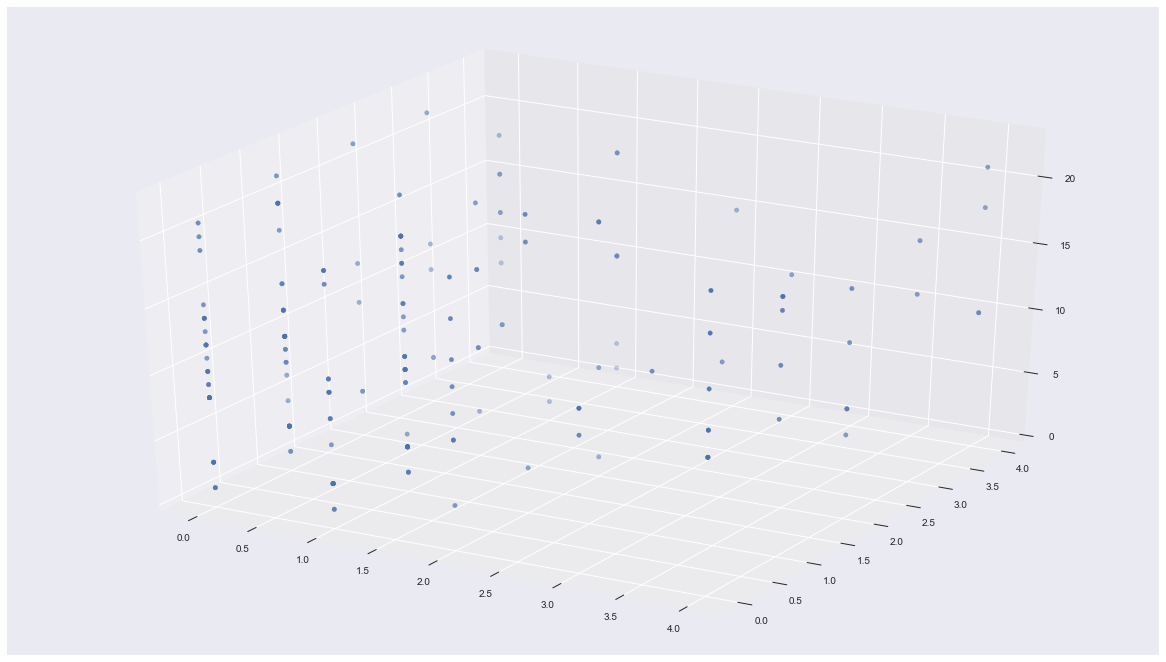

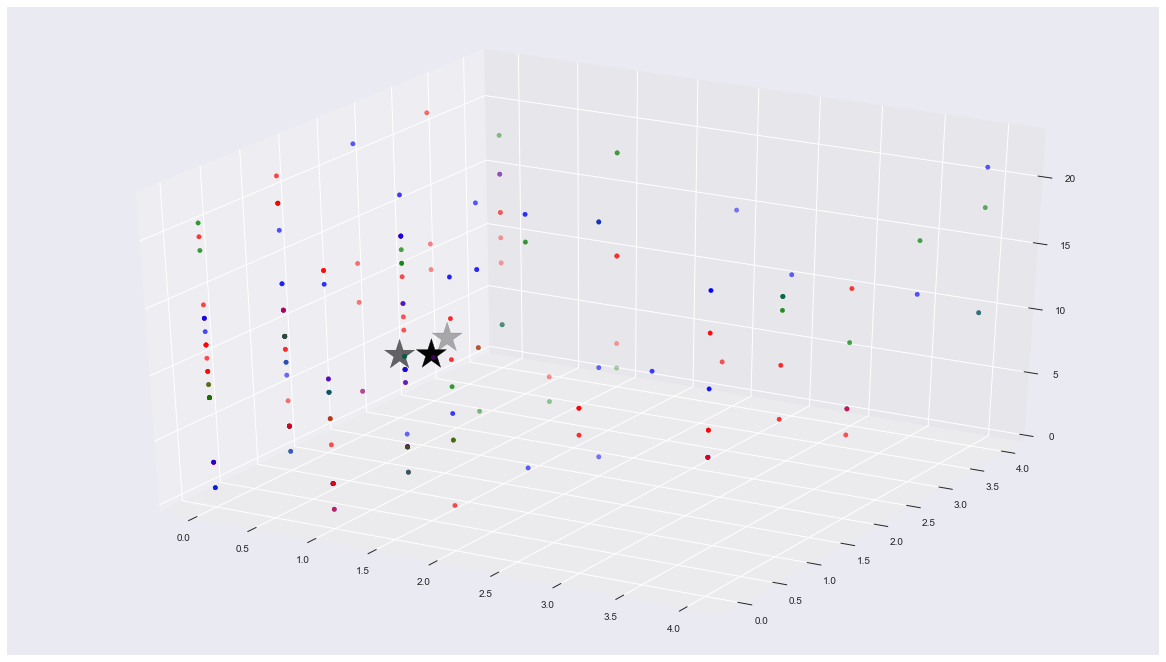

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)
colors = ['r', 'g', 'b', 'y', 'c', 'm']

# Creating a sample dataset with 4 clusters
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y_lyrics[:, 0], Y_lyrics[:, 1], Y_lyrics[:,2])

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(Y_lyrics)
# Predicting the clusters
labels = kmeans.predict(Y_lyrics)
# Getting the cluster centers

C = kmeans.cluster_centers_
labels_ = []
for i in labels:
    labels_.append(colors[i])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y_lyrics[:, 0], Y_lyrics[:, 1], Y_lyrics[:,2], c=labels_)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
plt.show()
arr_ = ClusterIndicesNumpy(0, labels)


In [24]:
#analyzing the clusters
genre_array = {1: 'pop', 2: 'jazz',3:'rock',4: 'avant-garde',5:'ballad',  6:'blues',  7:'country blues', 
               8:'alternative metal',9:'soul',10:'alternative rock',11:'R&B',12:'crossover thrash', 
               13:'metal',14:'k-pop',15:'ska',16:'rock steady',17:'folk',18:'punk rock', 
               19:'indie rock',20:'country',21:'underground rap',22:'alternative'}
emotion_array = {0: 'sadness', 1: 'joy',2:'fear',3: 'disgust',4:'anger'}
                 
sp = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
cluster1 =  ClusterIndicesNumpy(0,labels)
cluster2 =  ClusterIndicesNumpy(1,labels)
cluster3 =  ClusterIndicesNumpy(2,labels)
view = []
print(str(len(cluster1)) + " here")
for i in cluster1:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        print(str(sp.loc[i, 'Artist']) + ", " + str(sp.loc[i, 'Song Title']) + ", " + str(genre_array[genre]) + ", " + str(emotion_array[verse]) + ", " + str(emotion_array[chorus]) + ", " + str(tempo) + ", " + str(loudness)+ ", " + str(energy))
    except Exception as e:
        print(e)
print(len(cluster2))
for i in cluster2:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        print(str(sp.loc[i, 'Artist']) + ", " + str(sp.loc[i, 'Song Title']) + ", " + str(genre_array[genre]) + ", " + str(emotion_array[verse]) + ", " + str(emotion_array[chorus]) + ", " + str(tempo) + ", " + str(loudness)+ ", " + str(energy))
    except Exception as e:
        print(e)

print(len(cluster3))
for i in cluster3:
    try:
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        print(str(sp.loc[i, 'Artist']) + ", " + str(sp.loc[i, 'Song Title']) + ", " + str(genre_array[genre]) + ", " + str(emotion_array[verse]) + ", " + str(emotion_array[chorus]) + ", " + str(tempo) + ", " + str(loudness)+ ", " + str(energy))
    except Exception as e:
        print(e)

95 here
Antonio Flores, Isla de Palma, ballad, sadness, joy, 118.029, -11.333, 0.661
Badfinger, Come On, rock, sadness, joy, 142.38, -6.832, 0.877
Badfinger, Dennis, rock, fear, sadness, 118.191, -8.446, 0.666
Badfinger, Just A Chance, rock, sadness, sadness, 123.517, -9.063, 0.752
Badfinger, Know One Knows, rock, sadness, joy, 119.829, -8.228, 0.743
Badfinger, Three Time Loser, rock, sadness, sadness, 125.466, -8.013, 0.897
Billie Holiday, Gloomy Sunday, blues, anger, fear, 127.089, -11.273, 0.0823
Chris Cornell, Higher Truth, alternative metal, sadness, sadness, 119.531, -5.426, 0.792
Chris Cornell, Let Your Eyes Wander, alternative metal, joy, joy, 132.804, -10.678, 0.294
Chris Cornell, Nearly Forgot My Broken Heart, alternative metal, fear, sadness, 119.531, -5.426, 0.792
Chris Cornell, Our Time In The Universe, alternative metal, joy, fear, 118.01, -6.238, 0.865
Chris Cornell, Wrong Side, alternative metal, sadness, sadness, 125.975, -5.359, 0.661
Del Shannon, Runaway, blues, joy,

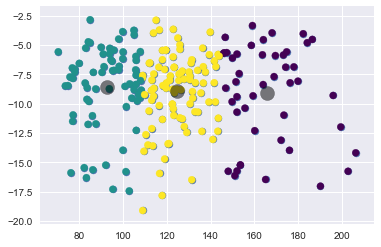

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
X = Y_lyrics
plt.scatter(X[:,3], X[:, 4], s=50);

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 3], X[:, 4], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 4], c='black', s=200, alpha=0.5);

In [28]:
#clustering with 3d visuas
import numpy as np
import pandas as pd

import csv
indexes = []
import operator
lyrics = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
X_lyrics = lyrics[["sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Tempo","Loudness","Energy"]].as_matrix()
X_lyrics    

array([[  2.97842000e-01,   6.43527000e-01,   2.34340000e-02, ...,
          8.64780000e+01,  -7.32000000e+00,   7.36000000e-01],
       [  4.03503000e-01,   3.77848000e-01,   1.54008000e-01, ...,
          1.18029000e+02,  -1.13330000e+01,   6.61000000e-01],
       [  4.28785000e-01,   4.16169000e-01,   6.44780000e-02, ...,
          1.42380000e+02,  -6.83200000e+00,   8.77000000e-01],
       ..., 
       [  5.71947000e-01,   5.39841000e-01,   5.75150000e-02, ...,
          1.43529000e+02,  -1.12230000e+01,   3.00000000e-01],
       [  4.23553000e-01,   4.47584000e-01,   1.74226000e-01, ...,
          8.36370000e+01,  -8.61800000e+00,   6.49000000e-01],
       [  1.55213000e-01,   3.62808000e-01,   6.15480000e-02, ...,
          8.27310000e+01,  -8.22200000e+00,   5.96000000e-01]])

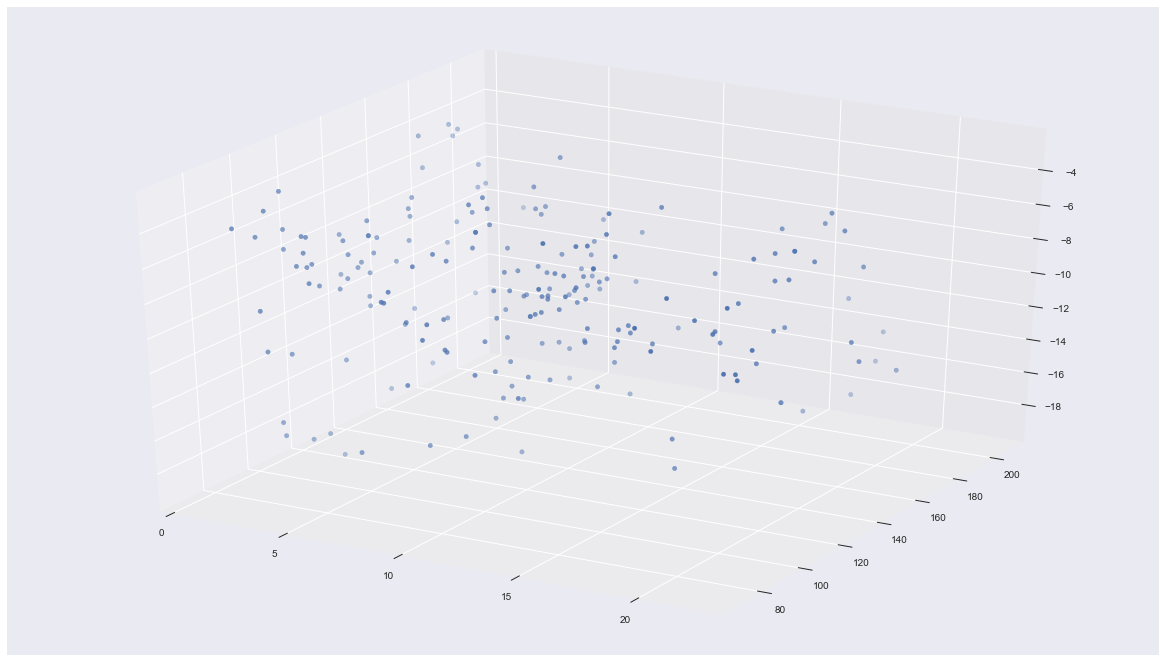

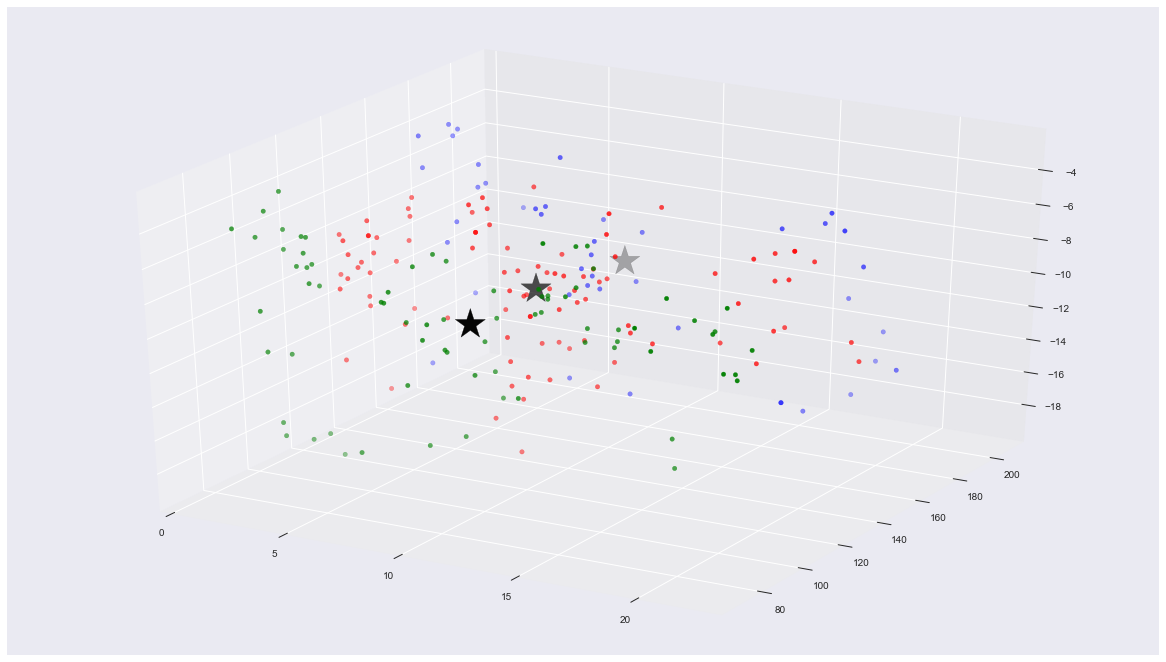

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)
colors = ['r', 'g', 'b', 'y', 'c', 'm']

# Creating a sample dataset with 4 clusters
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_lyrics[:, 10], X_lyrics[:, 11], X_lyrics[:,12])

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X_lyrics)
# Predicting the clusters
labels = kmeans.predict(X_lyrics)
# Getting the cluster centers

C = kmeans.cluster_centers_
labels_ = []
for i in labels:
    labels_.append(colors[i])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_lyrics[:, 10], X_lyrics[:, 11], X_lyrics[:,12], c=labels_)
ax.scatter(C[:, 10], C[:, 11], C[:, 12], marker='*', c='#050505', s=1000)
plt.show()
arr_ = ClusterIndicesNumpy(0, labels)

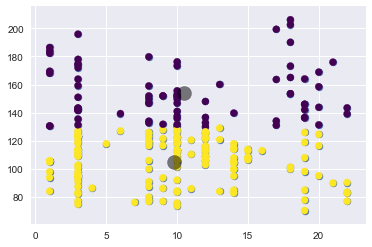

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
X = X_lyrics
plt.scatter(X[:,10], X[:, 11], s=50);

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 10], X[:, 11], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='black', s=200, alpha=0.5);